# **Ajuste de formas geométricas.**

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

#Parametros para graficos
plt.rcParams["figure.figsize"] = (7,7)
plt.rcParams.update({'font.size': 14})

En muchas aplicaciones es necesario resumir un conjunto de datos con una primitiva geométrica. Consideremos, por ejemplo, el caso de un círculo. Imaginemos la siguiente situación. Un robot provisto de un palpador puede obtener una serie de puntos sobre una circunferencia de eje cilíndrico, que puede estar afectado por desgaste o mala alineación. Se desea entonces calcular el radio y la posición del centro de su base a los datos medidos.

Una idea simple es la siguiente. Un círculo de centro $(x_0, y_0)$ y radio $r$ está descrito por la ecuación $(x - x_0)^2 + (y - y_0)^2 = r^2$. Desarrollando:

$x^2 - 2xx_0 + x_0^2 + y^2 - 2yy_0 + y_0^2 = r^2 \quad \Rightarrow \quad 2xx_0 + 2yy_0 + (r^2 - x_0^2 - y_0^2) = x^2 + y^2$

Si disponemos de $N$ datos $(x_i, y_i)$, $i = 1, \ldots, N$, esperaríamos encontrar valores $x_0, y_0$ y $r$ tales que se cumplen las $N$ ecuaciones

$2x_ix_0 + 2y_iy_0 + (r^2 - x_0^2 - y_0^2) = x_i^2 + y_i^2$

Este problema no tiene solución, pero podemos pensarlo en el sentido de cuadrados mínimos: hallar $A, B, C$ que minimicen $\sum_{i=1}^N (x_iA + y_iB + C - (x_i^2 + y_i^2))^2$. Este problema siempre tiene solución, y luego podemos interpretar: $A = 2x_0$, $B = 2y_0$, $C = r^2 - x_0^2 - y_0^2$.

### 1.
Escribir un programa que implemente esta idea. Debe recibir una matriz de N pares (xi, yi) y devolver los parametros de la circunferencia.


In [2]:
def cuadradosMinimos(datos):
    A = np.ones((len(datos),3))

    for i in range(len(datos)):
        A[i] = [datos[i][0], datos[i][1], 1]

    At = A.T
    AtA = At@A
    b = np.ones(len(datos))

    for i in range(len(datos)):
        b[i] = (datos[i][0])**2 + (datos[i][1])**2

    Atb = At@b
    A, B, C = np.linalg.solve(AtA,Atb)
    x0 = A/2
    y0 = B/2
    r = (C + x0**2 + y0**2)**(1/2)

    return (r,x0,y0)

### 2.
Para probar el programa podemos simular su aplicación sobre datos generados artificialmente. Generar conjuntos de datos según las siguientes pautas y graficarlos junto con el círculo obtenido a partir de ellos:
- a) Datos sobre un círculo completo, sin ruido.
- b) Datos sobre un círculo completo, con ruido aleatorio.
- c) Datos sobre un arco de circunferencia de amplitud $0 < \alpha \leq 2\pi$, con ruido.

Analizar $\alpha$ pequeño (del orden de $\pi/4$, por ejemplo). Testear más de un conjunto de datos por cada categoría.

In [3]:
def circulo(r,x0,y0,N):
    t = np.linspace(0, 2*np.pi, N)
    x = np.zeros(N)
    y = np.zeros(N)
    for i in range(N):
        x[i] = x0 + r*np.cos(t[i])
        y[i] = y0 + r*np.sin(t[i])
    return (x,y)


#(r,x0,y0) son los datos del circulo, a va de 1 a 100 y representa que porcentaje del circulo se quiere graficar,
# y el error es la cantidad de error relativo que se quiere aplicar

def setDatosCirculares(r,x0,y0,a=100,error=0,N=150):
    t = np.linspace(0, 2*np.pi*(a/100), N)
    XY = np.zeros((N,2))
    for i in range(N):
        XY[i,0] = (x0 + x0*random.uniform((-error),error)) + (r + r*random.uniform((-error),error))*np.cos(t[i])
        XY[i,1] = (y0 + y0*random.uniform((-error),error)) + (r + r*random.uniform((-error),error))*np.sin(t[i])
    return XY

# a) datos sobre un circulo completo, sin ruido,
# b) datos sobre un circulo completo, con ruido aleatorio
# c) datos sobre un arco de circunferencia de amplitud 0 < a ≤ 2π, con ruido.

a1 = setDatosCirculares(1,0,0)
a2 = setDatosCirculares(3,1,1)
a3 = setDatosCirculares(2,3,1)

b1 = setDatosCirculares(1,0,0,100,0.1)
b2 = setDatosCirculares(1,0,0,100,0.2)
b3 = setDatosCirculares(1,0,0,100,0.2,300)
b4 = setDatosCirculares(1,0,0,100,0.4)

c1 = setDatosCirculares(1,0,0,25,0)
c2 = setDatosCirculares(1,0,0,25,0.1)
c3 = setDatosCirculares(1,0,0,50,0, 300)
c4 = setDatosCirculares(1,0,0,50,0.2,300)
c5 = setDatosCirculares(1,0,0,25,0.4,500)

tests = {'a1':a1, 'a2':a2, 'a3':a3, 'b1':b1, 'b2':b2, 'b3':b3, 'b4':b4, 'c1':c1, 'c2':c2, 'c3':c3, 'c4':c4, 'c5':c5}

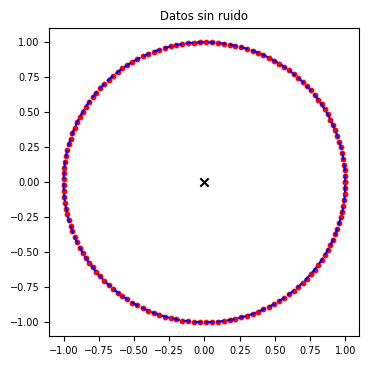

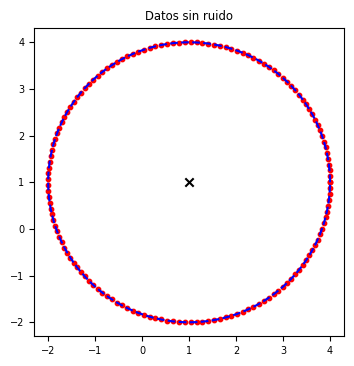

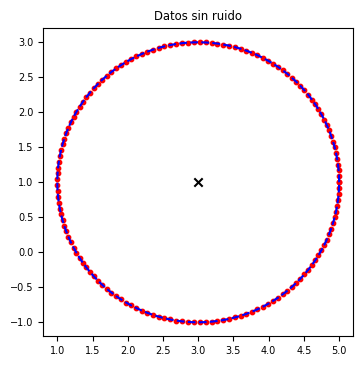

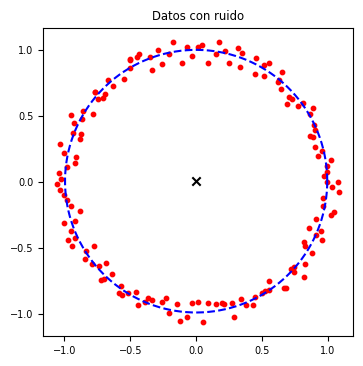

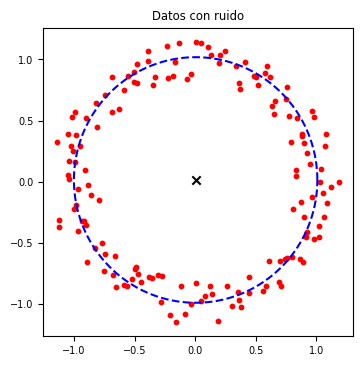

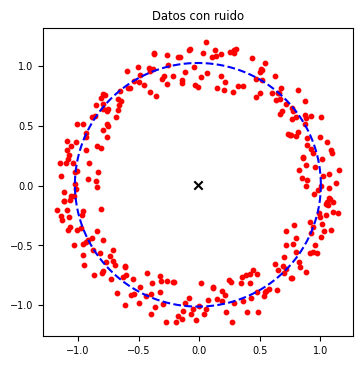

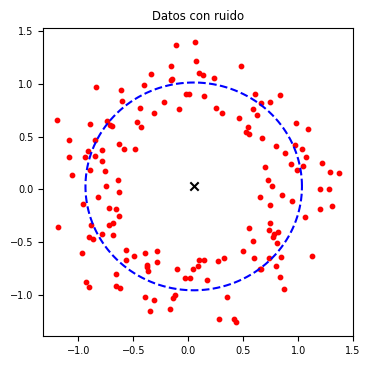

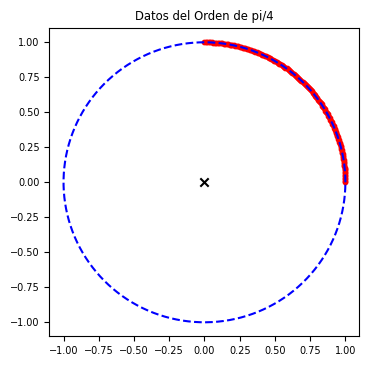

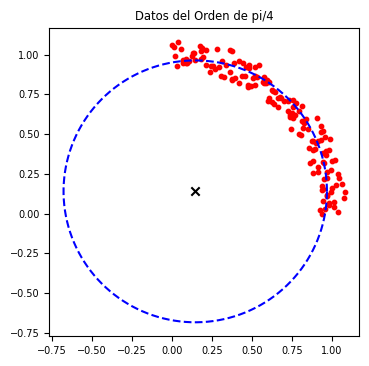

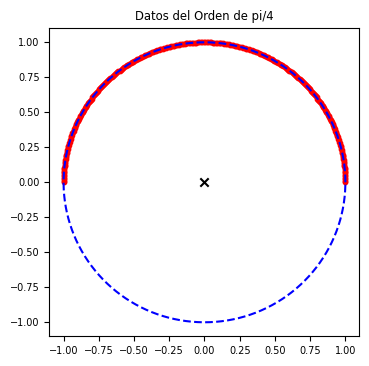

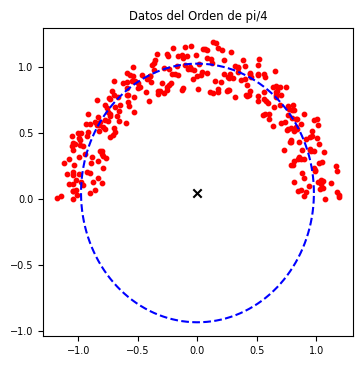

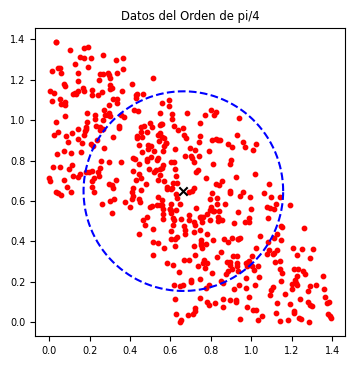

In [4]:
def compararDatosCuadradosMinimos(datos):
    plt.scatter(datos[:,0], datos[:,1], color='red', s=10)
    ajusteCuadradosMinimos = cuadradosMinimos(datos)
    circuloCuadradosMinimos = circulo(ajusteCuadradosMinimos[0], ajusteCuadradosMinimos[1], ajusteCuadradosMinimos[2], len(datos))
    plt.plot(circuloCuadradosMinimos[0], circuloCuadradosMinimos[1], '--b')
    plt.scatter(ajusteCuadradosMinimos[1], ajusteCuadradosMinimos[2], marker='x', color='black')

plt.rcParams["figure.figsize"] = (4,4)
plt.rcParams.update({'font.size': 7})

def CompararTestCuadradosMinimos():
  plt.rcParams["figure.figsize"] = (4,4)
  plt.rcParams.update({'font.size': 7})

  for i in tests:
    compararDatosCuadradosMinimos(tests[i])
    if i[0] == 'a':
      plt.title('Datos sin ruido')
    if i[0] == 'b':
      plt.title('Datos con ruido')
    if i[0] == 'c':
      plt.title('Datos del Orden de pi/4')
    plt.show()

  plt.rcParams["figure.figsize"] = (7,7)
  plt.rcParams.update({'font.size': 14})

CompararTestCuadradosMinimos()

Defino un tester para poder testear con datos arbitrarios

In [ ]:

def tester():
  print('Ingresar Parametros:')
  r   = float(input('Radio:'))
  x0  = float(input('x0:'))
  y0  = float(input('y0:'))
  a   = float(input('Porcentaje del angulo (entre 1 y 100):'))
  err = float(input('Error (entre 0 y 1):'))
  Datos = setDatosCirculares(r,x0,y0,a,err)
  compararDatosCuadradosMinimos(Datos)
  plt.show()

tester()


El abordaje anterior es lo que se llama "ajuste algebraico". Son los cuadrados de los residuos de la representación algebraica de la figura geométrica los que se minimizan, y no la distancia cuadrática a la curva.

Para implementar un "ajuste geométrico", se desea minimizar


$ \varepsilon_g(x_0, y_0, r) = \sum_{i=1}^N d_i^2(x_0, y_0, r)$,

donde $d_i(x_0, y_0, r)$ es la distancia del punto $(x_i, y_i)$ al círculo de parámetros $x_0, y_0, r$. Para resolver el problema, y estimar los valores $x_0, y_0, r$, utilizaremos el método de Newton para minimizar $\varepsilon_g$. El método de Newton consiste en aproximar la función en un punto $v_k$ por su polinomio de Taylor de orden 2 y luego minimizar ese polinomio, obteniendo un nuevo punto $v_{k+1}$. Esto da lugar a la iteración:

$ v_{k+1} = v_k - H(v_k)^{-1} \nabla \varepsilon_g(v_k)$ ,

donde $H(v)$ es la matriz hessiana de $\varepsilon_g$ evaluada en $v$. Se puede tomar como valor inicial, por ejemplo, $v_0 = (v_{01}, v_{02}, v_{03})$, donde $(v_{01}, v_{02})$ es el punto promedio de los datos, y $v_{03}$ es el promedio de las distancias a ese centro.

### 3.
Implementar un programa que reciba como input una función $f$ y un punto $z$ y calcule el vector gradiente de $f$ evaluado en $z$, y un programa que calcule el hessiano de $f$ evaluado en $z$, ambos utilizando diferencias forward.


In [5]:
# Utilizo h = 10^(-8) para minimizar el error (Si el h es mas chico, comienza a dar datos erroneos por cancelaciones catastroficas)

def derivadaParcial(f,z,i,h=10**(-8)):
    zi = z.copy()
    zi[i] += h
    Derivada = f(zi)/h - f(z)/h
    return Derivada

def gradiente(f, z):
    grad = np.zeros(len(z))
    for i in range(len(z)):
        grad[i] = derivadaParcial(f,z,i)
    return grad

def dobleDerivada(f,z,i,j,h=10**(-4)):
    zj = z.copy()
    zj[j] = zj[j] + h
    derivadaDefEnij = derivadaParcial(f,zj,i)/h - derivadaParcial(f,z,i)/h
    return derivadaDefEnij

def hessiano(f,z):
    H = np.zeros((len(z),len(z)))
    for i in range(len(z)):
        for j in range(len(z)):
            H[i,j] = dobleDerivada(f,z,i,j)
    return H

### 4.
Implementar un programa que aplique el método de Newton, utilizando los programas del ejercicio anterior para computar el gradiente y el hessiano, y el método de Cholesky para resolver el sistema.

Verificar el comportamiento del ajuste geométrico sobre los conjuntos de datos generados anteriormente.


In [6]:
def vectorInicial(datos):
    v01 = np.sum(datos[:,0])/len(datos[:,0])
    v02 = np.sum(datos[:,1])/len(datos[:,1]) # (v01 , v02 ) es el punto promedio de los datos
    distancias = np.zeros(len(datos))
    for i in range(len(datos)):
        distancias[i] = ((datos[i,0]-v01)**2 + (datos[i,1]-v02)**2)**(1/2)
    v03 = np.sum(distancias)/len(distancias) # v03 es el promedio de las distancias a ese centro.

    return np.array([v01,v02,v03])

def matrizDeCholesky(A):
    n = len(A)
    L = np.zeros((n,n))

    L[0,0] = np.sqrt(A[0,0])

    for i in range(1,n):
        L[i,0] = A[i,0]/L[0,0]

    for j in range (1,n):
        L[j,j] = np.sqrt(A[j,j] - np.dot(L[j,0:j],L[j,0:j]))
        if j < n:
            for i in range(j+1, n):
                L[i,j] = (A[i,j] - np.dot(L[i,0:j],L[j,0:j]))/L[j,j]
    return L


def resolverSistemaCholesky(A, b):
    n = len(A)
    L = matrizDeCholesky(A)

    # (Ly = b)
    y = np.zeros(n)
    y[0] = b[0] / L[0, 0]
    for i in range(1, n):
        y[i] = (b[i] - np.dot(L[i, :i], y[:i])) / L[i, i]

    # (L^T x = y)
    x = np.zeros(n)
    x[n-1] = y[n-1] / L[n-1, n-1]
    for i in range(n-2, -1, -1):
        x[i] = (y[i] - np.dot(L[i+1:, i], x[i+1:])) / L[i, i]

    return x

In [7]:
def newton(datos):
    V0 = vectorInicial(datos)
    Vs = [V0]
    err = 10**(-6)

    def e(C):
        x0 = C[0]
        y0 = C[1]
        r  = C[2]
        sum = 0

        for i in range(len(datos)):
            sum += abs(np.sqrt((datos[i,0] - x0)**2 + (datos[i,1] - y0)**2) - r)**2

        return sum

    i = 0
    while True:
        V1 = Vs[-1]
        H = hessiano(e, [V1[0], V1[1], V1[2]])
        Ge = gradiente(e, [V1[0], V1[1], V1[2]])
        V2 = V1 - resolverSistemaCholesky(H,Ge)
        Vs.append(V2)
        i += 1

        if np.linalg.norm(V1-V2) < err or i > 1000:
            break

    x0, y0, r = Vs[-1]
    return (r,x0,y0)


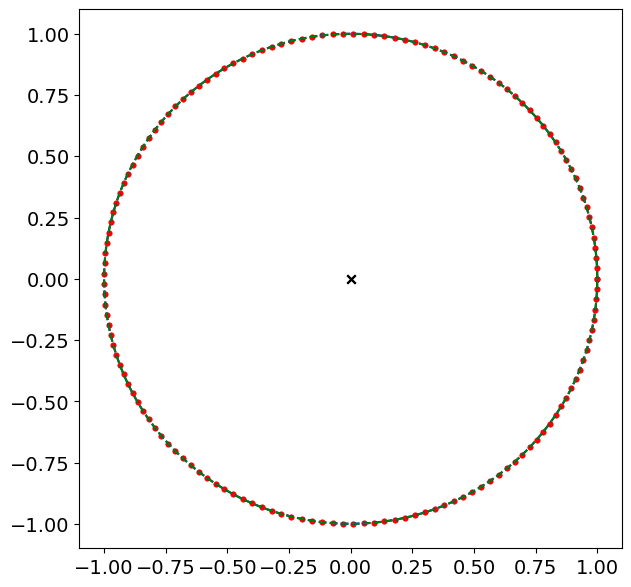

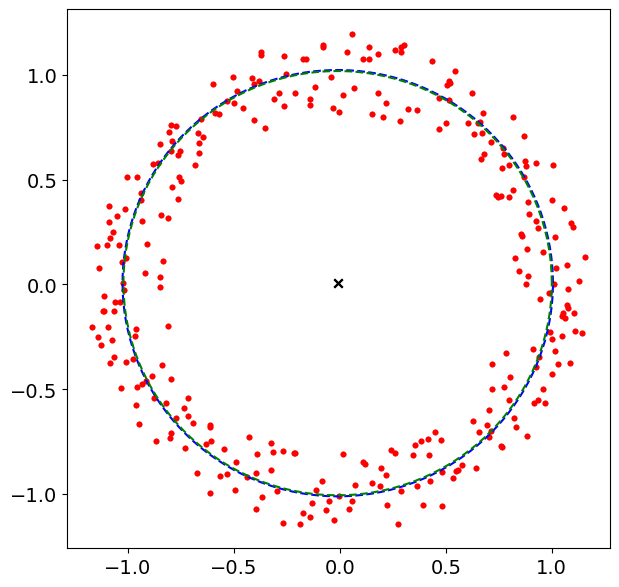

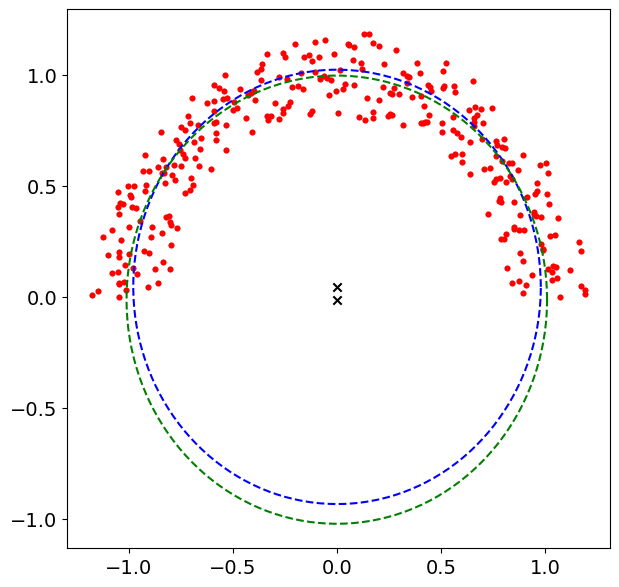

In [8]:
def compararDatosNewton(datos):
    plt.scatter(datos[:,0], datos[:,1], color='red', s=10)
    ajusteNewton = newton(datos)
    circuloNewton = circulo(ajusteNewton[0], ajusteNewton[1], ajusteNewton[2], len(datos))
    plt.plot(circuloNewton[0], circuloNewton[1], '--g')
    plt.scatter(ajusteNewton[1], ajusteNewton[2], marker='x', color='black')

compararDatosCuadradosMinimos(a1)
compararDatosNewton(a1)
plt.show()

compararDatosCuadradosMinimos(b3)
compararDatosNewton(b3)
plt.show()

compararDatosCuadradosMinimos(c4)
compararDatosNewton(c4)
plt.show()